# **Logistic Regression**

**Steps:**
1. Design the Model (Input size, Output size, Forward pass)
2. Construct loss and Optimizer
3. Create the training loop:
   - Forward Pass: Compute the prediction and loss.
   - Backward Pass: Compute the Gradients
   - Update the weights

Importing Torch, Neural Network Module, Numpy, Sklearn and MatPlotLib

In [13]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.model_selection import train_test_split # For separating training and testing data
import matplotlib.pyplot as plt

Preparing a Regression dataset

In [14]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # Test Size = 20%

# Feature Scaling
sc = StandardScaler() # Zero Mean and Unit Variance in the Features (Recommended for Logistic Regression)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#Reshaping Y Tensor

y_train = y_train.view(y_train.shape[0], 1) # Only one Row
y_test = y_test.view(y_test.shape[0], 1)

569 30


Creating the Logistic Regression Model

In [15]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)
print(model)

LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)


Using the built-in Loss and Optimizer

In [16]:
criterion = nn.BCELoss() # Binary Cross Error Function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent

Training the Model

In [17]:
num_epochs = 100
loss_values = []  # Initializing a list to store loss values
for epoch in range(num_epochs):
    y_pred = model(X_train) # Making Prediction using the given data (Forward Pass)
    loss = criterion(y_pred, y_train) # Calculating Loss from the Prediction
    loss.backward() # Backpropagation (Backward Pass)
    optimizer.step() # Update the weights
    optimizer.zero_grad() # Emptying the Gradients
    
    # Store the loss value
    loss_values.append(loss.item())
    if(epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

epoch: 10, loss: 0.6628
epoch: 20, loss: 0.5337
epoch: 30, loss: 0.4539
epoch: 40, loss: 0.4000
epoch: 50, loss: 0.3610
epoch: 60, loss: 0.3311
epoch: 70, loss: 0.3074
epoch: 80, loss: 0.2880
epoch: 90, loss: 0.2717
epoch: 100, loss: 0.2578


Plot of Training Loss over Epochs

Accuracy: 0.8947


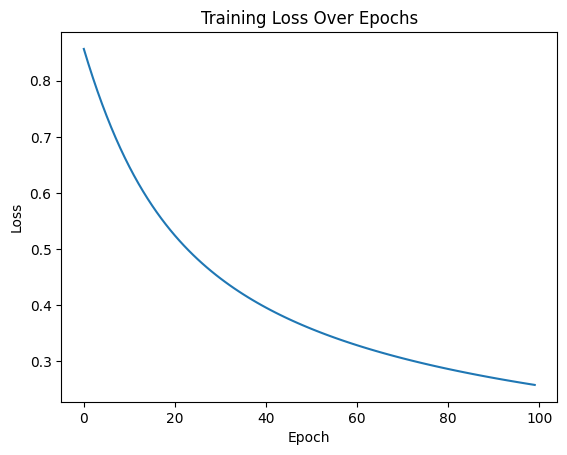

In [22]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc:.4f}')
    
    # Plot the loss values
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()